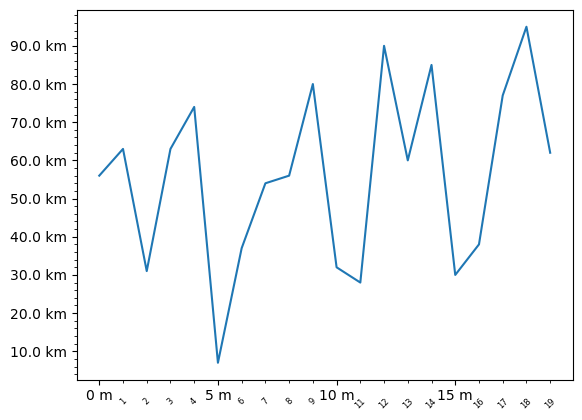

In [1]:
## 刻度定位器
## https://matplotlib.org/stable/api/ticker_api.html#
## https://matplotlib.org/stable/gallery/ticks/tick-locators.html

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.gca()

## ps:这两个api都可以设置刻度器,会相互影响,谁在后面设置,优先级高,会覆盖前面的设置
##    刻度会被刻度内容覆盖,刻度标签文本会被文本格式覆盖,如果不存在,则不覆盖
## 1.设置刻度器
plt.xticks([i for i in range(20)], [str(i) + " m" for i in range(20)])


# 设置x主刻度器
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.0f'))
##https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
## 设置坐标轴的其他属性
ax.xaxis.set_tick_params(which='minor', pad=10, labelrotation=45, labelsize=6)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x} km"))

# 设置y主刻度器
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x} km"))


plt.plot(np.arange(0, 20), np.random.randint(1, 100, size=20, dtype=int))

plt.show()

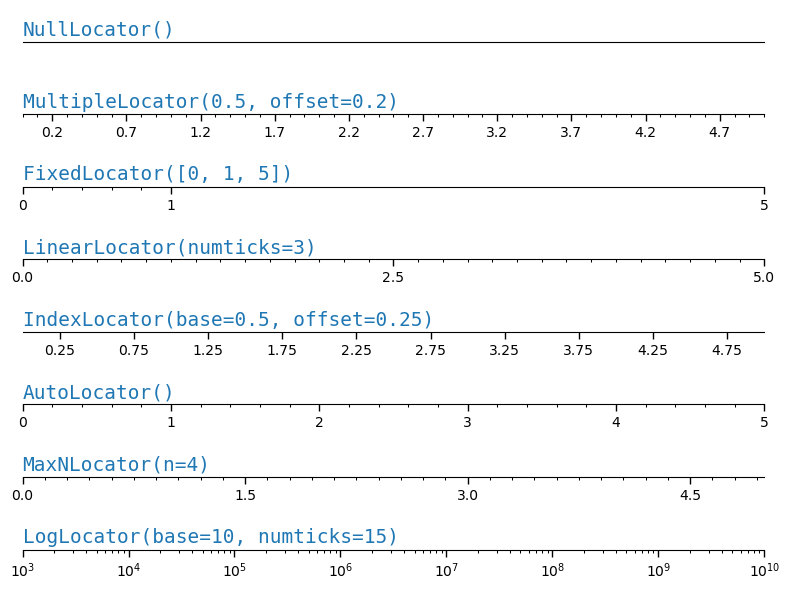

In [2]:
## 常见刻度器
import matplotlib.ticker as ticker

# https://www.aidoczh.com/matplotlib/api/ticker_api.html#matplotlib.ticker.MultipleLocator

def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')

fig, axs = plt.subplots(8, 1, figsize=(8, 6))

# Null Locator
setup(axs[0], title="NullLocator()")
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].xaxis.set_minor_locator(ticker.NullLocator())

# Multiple Locator
setup(axs[1], title="MultipleLocator(0.5, offset=0.2)")
## offset 起始刻度偏移量 base时刻度相邻间隔
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5, offset=0.2))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# Fixed Locator
# 按给定的数组进行绘制
setup(axs[2], title="FixedLocator([0, 1, 5])")
axs[2].xaxis.set_major_locator(ticker.FixedLocator([0, 1, 5]))
axs[2].xaxis.set_minor_locator(ticker.FixedLocator(np.linspace(0.2, 0.8, 4)))

# Linear Locator
setup(axs[3], title="LinearLocator(numticks=3)")
axs[3].xaxis.set_major_locator(ticker.LinearLocator(3))
axs[3].xaxis.set_minor_locator(ticker.LinearLocator(31))

# Index Locator
# offset起始偏移量, base确定相邻的间隔
setup(axs[4], title="IndexLocator(base=0.5, offset=0.25)")
axs[4].plot([0]*5, color='white')
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=0.5, offset=0.25))

# Auto Locator
# 由系统自动选择刻度位置,美观为主
setup(axs[5], title="AutoLocator()")
axs[5].xaxis.set_major_locator(ticker.AutoLocator())
axs[5].xaxis.set_minor_locator(ticker.AutoMinorLocator())

# MaxN Locator
# 最多绘制nbins+1个刻度 比如范围10,n=4,则2.5, 5, 7.5, 10
setup(axs[6], title="MaxNLocator(n=4)")
axs[6].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[6].xaxis.set_minor_locator(ticker.MaxNLocator(40))

# Log Locator
# 对数定位器 base是对数底
setup(axs[7], title="LogLocator(base=10, numticks=15)")
axs[7].set_xlim(10**3, 10**10)
axs[7].set_xscale('log')
axs[7].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))

plt.tight_layout()
plt.show()

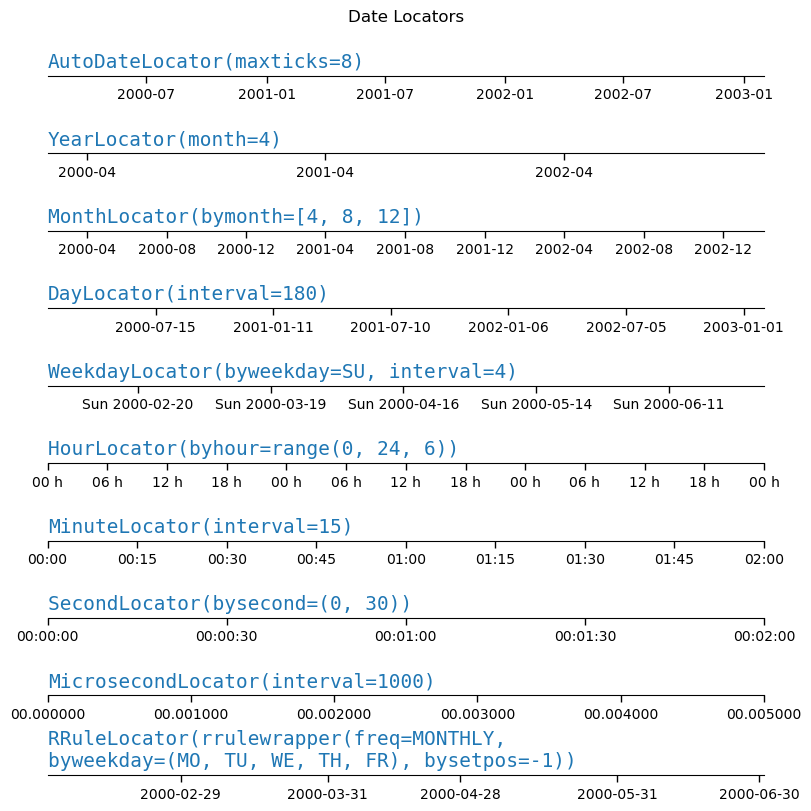

In [3]:
## 日期刻度器

from matplotlib.dates import (FR, MO, MONTHLY, SA, SU, TH, TU, WE,
                              AutoDateFormatter, AutoDateLocator,
                              ConciseDateFormatter, DateFormatter, DayLocator,
                              HourLocator, MicrosecondLocator, MinuteLocator,
                              MonthLocator, RRuleLocator, SecondLocator,
                              WeekdayLocator, YearLocator, rrulewrapper)
import matplotlib.ticker as ticker

def plot_axis(ax, locator=None, xmax='2002-02-01', fmt=None, formatter=None):
    """Set up common parameters for the Axes in the example."""
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    ax.set_xlim(np.datetime64('2000-02-01'), np.datetime64(xmax))
    if locator:
        ax.xaxis.set_major_locator(eval(locator))
        ax.xaxis.set_major_formatter(DateFormatter(fmt))
    else:
        ax.xaxis.set_major_formatter(eval(formatter))
    ax.text(0.0, 0.2, locator or formatter, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')

locators = [
    # locator as str, xmax, fmt
    ('AutoDateLocator(maxticks=8)', '2003-02-01', '%Y-%m'),
    ('YearLocator(month=4)', '2003-02-01', '%Y-%m'),
    ('MonthLocator(bymonth=[4, 8, 12])', '2003-02-01', '%Y-%m'),
    ('DayLocator(interval=180)', '2003-02-01', '%Y-%m-%d'),
    ('WeekdayLocator(byweekday=SU, interval=4)', '2000-07-01', '%a %Y-%m-%d'),
    ('HourLocator(byhour=range(0, 24, 6))', '2000-02-04', '%H h'),
    ('MinuteLocator(interval=15)', '2000-02-01 02:00', '%H:%M'),
    ('SecondLocator(bysecond=(0, 30))', '2000-02-01 00:02', '%H:%M:%S'),
    ('MicrosecondLocator(interval=1000)', '2000-02-01 00:00:00.005', '%S.%f'),
    ('RRuleLocator(rrulewrapper(freq=MONTHLY, \nbyweekday=(MO, TU, WE, TH, FR), '
     'bysetpos=-1))', '2000-07-01', '%Y-%m-%d'),
]

fig, axs = plt.subplots(len(locators), 1, figsize=(8, len(locators) * .8),
                        layout='constrained')
fig.suptitle('Date Locators')
for ax, (locator, xmax, fmt) in zip(axs, locators):
    plot_axis(ax, locator, xmax, fmt)

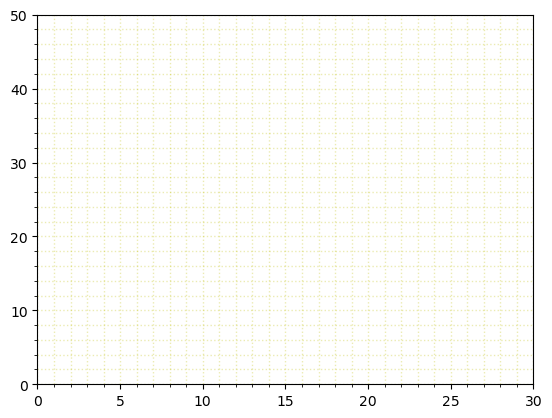

In [4]:
## 刻度网格线

fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.xlim(0, 30)
plt.ylim(0, 50)
plt.grid(
    which='both', ## major/minor/both
    axis='both', ## x/y/both
    linestyle=':',
    color='y',
    linewidth=1,
    alpha=0.3
)

plt.show()

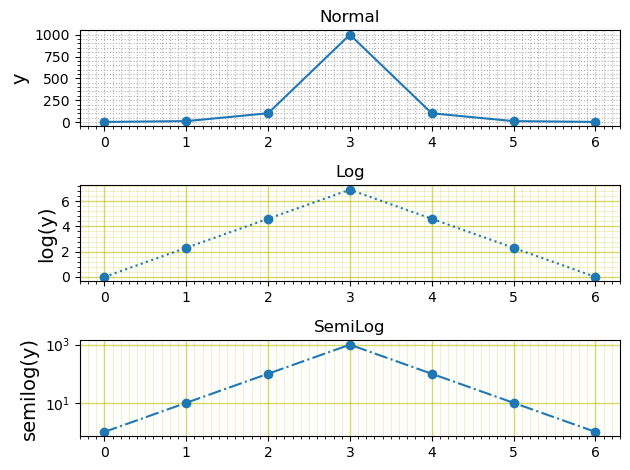

In [5]:
## log刻度和semilog刻度
y = np.array([1, 10, 100, 1000, 100, 10, 1])
plt.figure('Normal & Log')
plt.subplot(3, 1, 1)
plt.title('Normal')
plt.ylabel('y', fontsize=14)
plt.plot(y, 'o-')
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(250))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.grid(
    which='both', axis='both', linestyle=':',
)

plt.subplot(3, 1, 2)
plt.title('Log')
plt.ylabel('log(y)', fontsize=14)
plt.plot(np.log(y), 'o:')
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.4))
ax.grid(
    which='major', axis='both', linestyle='-', linewidth=1, color='y', alpha=0.6
)
ax.grid(
    which='minor', axis='both', linestyle='-', linewidth=0.5, color='y', alpha=0.3
)

plt.subplot(3, 1, 3)
plt.title('SemiLog')
plt.ylabel('semilog(y)', fontsize=14)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(250))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.grid(
    which='major', axis='both', linestyle='-', linewidth=1, color='y', alpha=0.6
)
ax.grid(
    which='minor', axis='both', linestyle='-', linewidth=0.5, color='y', alpha=0.3
)
plt.semilogy(y, 'o-.')
plt.tight_layout()
plt.show()